
**Болатаева Дарья**


 ---

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

Будем предсказывать удовлетворенность студентов их программой (`LikeDegree`).


### Часть 1: Исследуем данные


In [5]:
df = pd.read_csv('Student_Behaviour.csv')
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


Проверим колонки на наличие пропусков.

У нас имеется 235 наблюдений. Можно заметить, что пропущенных значений нет: количество ненулевых (non-null) значений совпадает с длиной столбцов.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CertificationCourses  235 non-null    object 
 1   Gender                235 non-null    object 
 2   Department            235 non-null    object 
 3   Height(CM)            235 non-null    float64
 4   Weight(KG)            235 non-null    float64
 5   10Mark                235 non-null    float64
 6   12Mark                235 non-null    float64
 7   CollegeMark           235 non-null    float64
 8   Hobbies               235 non-null    object 
 9   DailyStudingTime      235 non-null    object 
 10  PreferToStudyIn       235 non-null    object 
 11  SalaryExpectation     235 non-null    int64  
 12  LikeDegree            235 non-null    object 
 13  CareerBasedonDegree   235 non-null    object 
 14  GamesSpendingTime     235 non-null    object 
 15  TravellingTime        2

In [7]:
# но на всякий случай применим метод .dropna()

df = df.dropna()

Колонку `CareerBasedonDegree` приведем к числовому виду.

In [8]:
df['CareerBasedonDegree'] = df["CareerBasedonDegree"].apply(lambda x: float(x[:-1]) / 100)

# посмотрим на новые значения

df['CareerBasedonDegree']

0      0.50
1      0.75
2      0.50
3      0.50
4      0.25
       ... 
230    0.50
231    0.75
232    0.50
233    0.75
234    0.75
Name: CareerBasedonDegree, Length: 235, dtype: float64

В массиве данных есть 3 поля с суффиксом `Time`, данные в них строковые, которые означают временной интервал. Попробуем извлечь минимальное время (левую границу интервала) для каждой из этих переменных и перевести в минуты.

In [9]:
# выведем все возможные варианты записи времени 

print(df['TravellingTime '].unique())
print(df['DailyStudingTime'].unique())
print(df['GamesSpendingTime'].unique())

['30 - 60 minutes' '0 - 30 minutes' '1 - 1.30 hour' '2 - 2.30 hour'
 '1.30 - 2 hour' 'more than 3 hour' '2.30 - 3 hour']
['0 - 30 minute' '30 - 60 minute' '1 - 2 Hour' '2 - 3 hour' '3 - 4 hour'
 'More Than 4 hour']
['1.30 - 2 hour' '1 - 1.30 hour' 'More than 2 hour' '30 - 60 Minute'
 '1 - 30 Minute' '0 Minute']


In [10]:
# определим функцию, которая будет переводить часы в минуты 

def get_minutes(string):
    lst = string.split(' ')
    if (lst[-1] == 'hour' or lst[-1] == 'Hour') and 'More' not in lst and 'more' not in lst:
        hour = float(lst[0])
        if str(hour).split('.')[1] == '0':
            minutes = hour * 60
        else: 
            if len(str(hour).split('.')[1]) == 1:
                minutes = float(str(hour).split('.')[0]) * 60 + float(str(hour).split('.')[1]) * 10
            else:
                minutes = float(str(hour).split('.')[0]) * 60 + float(str(hour).split('.')[1])
    elif lst[-1] == 'Minute' or lst[-1] == 'minute' or lst[-1] == 'minutes':
        minutes = float(lst[0])
    elif lst[0] == 'More' or lst[0] == 'more':
        minutes = float(lst[2]) * 60 
    else:
        minutes = 0 
    return minutes
        

In [11]:
# для колонки ``DailyStudingTime``

df['DailyStudingTime'] = df['DailyStudingTime'].apply(get_minutes)   

# для колонки ``TravellingTime``

df['TravellingTime '] = df['TravellingTime '].apply(get_minutes)

# для колонки ``GamesSpendingTime``

df['GamesSpendingTime'] = df['GamesSpendingTime'].apply(get_minutes)

df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0.0,Morning,40000,No,0.50,90.0,30.0,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30.0,Morning,15000,Yes,0.75,60.0,0.0,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,60.0,Anytime,13000,Yes,0.50,120.0,30.0,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,60.0,Anytime,1500000,No,0.50,90.0,0.0,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30.0,Morning,50000,Yes,0.25,90.0,30.0,Good,good,No


Выберем колонки (непрерывные переменные), которые будем использовать для предсказания целевой переменной с помощью knn

In [12]:
X = df[['Height(CM)', 'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'DailyStudingTime', 'SalaryExpectation',
          'CareerBasedonDegree', 'GamesSpendingTime', 'TravellingTime ']]

In [11]:
# посмотрим на описательные статистики 

X.describe()

,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,DailyStudingTime,SalaryExpectation,CareerBasedonDegree,GamesSpendingTime,TravellingTime
count,235.000000,235.000000,235.000000,235.000000,235.000000,235.000000,2.350000e+02,235.000000,235.000000,235.000000
mean,157.402128,60.803830,76.842128,68.780128,70.660553,57.829787,3.248168e+04,0.695745,49.731915,49.404255
std,21.510805,14.895844,13.050800,11.016533,15.727446,58.433730,1.113146e+05,0.211787,39.137611,46.726911
min,4.500000,20.000000,7.400000,45.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,152.000000,50.000000,70.000000,60.000000,60.000000,30.000000,1.500000e+04,0.500000,30.000000,30.000000
50%,160.000000,60.000000,80.000000,69.000000,70.000000,30.000000,2.000000e+04,0.750000,30.000000,30.000000
75%,170.000000,70.000000,86.250000,76.000000,80.000000,60.000000,2.500000e+04,0.750000,75.000000,60.000000
max,192.000000,106.000000,98.000000,94.000000,100.000000,240.000000,1.500000e+06,1.000000,120.000000,180.000000


По тому, как различаются значения среднего и медианы, можно судить о наличии выбросов: так, в случае с продолжительностью дневных занятий (``DailyStudingTime``) завышенное среднее (среднее = 57.82 vs медиана = 30) свидетельствует о нетипично высоких значениях переменной. Для уверенности можно рассчитать меру межквартильного размаха (разница между 1-ым и 3-им квартилями, а также нижнюю и верхнюю границы наблюдений.

In [13]:
# найдем выбросы через межквартильный размах для переменной ``DailyStudingTime``

# нижняя граница 

print(30 - 1.5 * (60 - 30))

#верхняя граница 

print(60 + 1.5 * (170 - 152))

-15.0
87.0


О наличии выбросов, то есть таких значений, которые выходят за границы данного диапазона, свидетельствует хотя бы максимальное значение переменной ``DailySudungTime``, равное 240, в то время как верхняя граница находится на уровне 87. Выбросы имеются также и в других колонках (напр., минмальное значение роста студента = 4.5 см, что, видимо, является ошибкой измерения и/или заполнения данных).

Посмотрим на распределение целевой переменной.

In [14]:
# переменная ``LikeDegree`` принимает всего два значения: 

df['LikeDegree'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
# посмотрим на соотношение классов

class_count = df['LikeDegree'].value_counts()
class_count

Yes    215
No      20
Name: LikeDegree, dtype: int64

In [16]:
imb = class_count.min() / class_count.max()
imb

0.09302325581395349

<AxesSubplot:title={'center':'Удовлетворенность обучением: Да (Yes) или Нет (No)?'}>

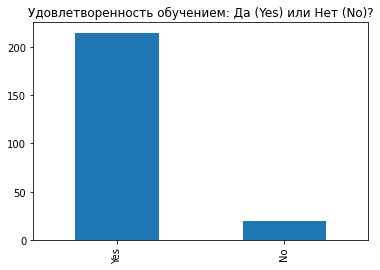

In [17]:
class_count.plot(kind='bar', title="Удовлетворенность обучением: Да (Yes) или Нет (No)?")

Налицо дисбаланс классов: ответов "Да" в 10.75 раз больше, что говорит о серьезном смещении ответов в сторону только одного из вариантов. Мы не сможем полагаться на метрику ``Accuracy``, которая показывает долю обьектов, для которых был верно предсказан класс, поскольку высокая точность (напр., предсказываем, нравится ли человеку обучение) обеспечивается просто потому, что отрицательных ответов намного меньше. Нам больше подойтет метрика ``Precision`` (какая доля из тех, кого предсказали, реально соответствуют своему значению) и ``Recall`` (какая доля из тех, кого надо было идентифицировать, была идентифицирована). Они не зависят от соотношения классов и потому применимы в условиях несбалансированных выборок.

Переведем целевую переменную к численному формату.

In [18]:
df["LikeDegree"] = df["LikeDegree"].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

,CertificationCourses,Gender,Department,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,Hobbies,DailyStudingTime,PreferToStudyIn,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime,StressLevel,FinancialStatus,PartTimeJob?
0,No,Male,BCA,100.0,58.0,79.0,65.0,80.0,Video Games,0.0,Morning,40000,0,0.50,90.0,30.0,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30.0,Morning,15000,1,0.75,60.0,0.0,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,69.5,61.0,55.0,Cinema,60.0,Anytime,13000,1,0.50,120.0,30.0,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,60.0,Anytime,1500000,0,0.50,90.0,0.0,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30.0,Morning,50000,1,0.25,90.0,30.0,Good,good,No


### Часть 2: Строим модели


In [19]:
y = df['LikeDegree']
X = df[['Height(CM)', 'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'DailyStudingTime', 'SalaryExpectation',
        'CareerBasedonDegree', 'GamesSpendingTime', 'TravellingTime ']]


from sklearn.model_selection import train_test_split

# делим в пропорции 70 к 30

y_train, y_test, X_train, X_test = train_test_split(y, X, test_size = 0.30, random_state = 42)

Построим сначала наивную модель предсказания для целевой переменной. Наивная модель - это самая простая модель, без сложных зависимостей. Например, для регрессии наивная модель - среднее для целевой переменной. В данном случае наивной моделью может быть преположение "все студенты (не)довольны".

In [21]:
from sklearn.metrics import recall_score

# построим наивную модель, где "все студенты недовольны"

y_naive = np.zeros(len(y_test))

# модель обнаружила 0% представителей класса Positive (1), что логично, если предполагать, что все студенты недовольны

recall_score(y_test, y_naive)

0.0

In [22]:
from sklearn.metrics import recall_score

# построим наивную модель, где "все студенты довольны"

y_naive = np.ones(len(y_test))

# обратная ситуация --> модель обнаружила 100% представителей класса Positive (1), что логично, если предполагать, 
# что все студенты довольны

recall_score(y_test, y_naive)

1.0

Построим модели ближайших соседей для 3, 5, 7 ближайших соседей. 

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# KNN с 3 соседями

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)
y_pred_knn3 = knn.predict(X_test)

# KNN c 5 соседями

knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train, y_train)
y_pred_knn5 = knn.predict(X_test)

# KNN с 7 cоседями

knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, y_train)
y_pred_knn7 = knn.predict(X_test)

Построим метрики качества на тестовой выборке.

In [25]:
from sklearn.metrics import recall_score, precision_score, f1_score

print('Naive Model')
print(f'recall score: {recall_score(y_test, y_naive)}')
print(f'precision score: {precision_score(y_test, y_naive)}')
print(f'f1 score: {f1_score(y_test, y_naive)}')

print('--------------------------------')

print('KNN with k = 3 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn3)}')
print(f'precision score: {precision_score(y_test, y_pred_knn3)}')
print(f'f1 score: {f1_score(y_test, y_pred_knn3)}')

print('--------------------------------')

print('KNN with k = 5 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn5)}')
print(f'precision score: {precision_score(y_test, y_pred_knn5)}')
print(f'f1 score: {f1_score(y_test, y_pred_knn5)}')

print('--------------------------------')

print('KNN with k = 7 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn7)}')
print(f'precision score: {precision_score(y_test, y_pred_knn7)}')
print(f'f1 score: {f1_score(y_test, y_pred_knn7)}')

Naive Model
recall score: 1.0
precision score: 0.9154929577464789
f1 score: 0.9558823529411764
--------------------------------
KNN with k = 3 Nearest Neighbors
recall score: 0.9846153846153847
precision score: 0.9142857142857143
f1 score: 0.9481481481481482
--------------------------------
KNN with k = 5 Nearest Neighbors
recall score: 1.0
precision score: 0.9154929577464789
f1 score: 0.9558823529411764
--------------------------------
KNN with k = 7 Nearest Neighbors
recall score: 1.0
precision score: 0.9154929577464789
f1 score: 0.9558823529411764


In [26]:
# посмотрим на предсказания

print(f'KNN with k = 3 Nearest Neighbors \n{list(y_pred_knn3)}')
print('  ')
print(f'KNN with k = 5 Nearest Neigbors \n{list(y_pred_knn5)}')
print(' ')
print(f'KNN with k = 7 Nearest Neigbors \n{list(y_pred_knn7)}')

KNN with k = 3 Nearest Neighbors 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  
KNN with k = 5 Nearest Neigbors 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 
KNN with k = 7 Nearest Neigbors 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Наилучшим качеством отличаются **KNN-модели с 5 и 7 ближайшими соседями**: KNN с 3 соседями уступает по значению метрик ``presicion_score`` и ``f1_score``, то же справедливо и для наивной модели ("все студенты довольны" или предсказывает для всех объектов "ДА"). Заметим также, что KNN с k = 3 – это единственная модель среди всех, которая предсказываем для одного из объектов "0" (и потому отличается от наивного прогноза).

Применим шкалирование.

In [27]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train_sc = scaler.transform(X_train) 
X_test_sc = scaler.transform(X_test)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

#KNN c 3 cоседями

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_sc, y_train)
y_pred_knn_3sc = knn.predict(X_test_sc)

#KNN c 5 соседями

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_sc, y_train)
y_pred_knn_5sc = knn.predict(X_test_sc)

#KNN c 7 cоседями

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train_sc, y_train)
y_pred_knn_7sc = knn.predict(X_test_sc)

In [29]:
print('KNN with k = 3 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn_3sc)}')
print(f'precision score: {precision_score(y_test, y_pred_knn_3sc)}')
print(f'f1_score: {f1_score(y_test, y_pred_knn_3sc)}')

print('--------------------------------')

print('KNN with k = 5 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn_5sc)}')
print(f'precision score: {precision_score(y_test, y_pred_knn_5sc)}')
print(f'f1_score: {f1_score(y_test, y_pred_knn_5sc)}')

print('--------------------------------')

print('KNN with k = 7 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn_7sc)}')
print(f'precision score: {precision_score(y_test, y_pred_knn_7sc)}')
print(f'f1_score: {f1_score(y_test, y_pred_knn_7sc)}')

KNN with k = 3 Nearest Neighbors
recall score: 0.9846153846153847
precision score: 0.9142857142857143
f1_score: 0.9481481481481482
--------------------------------
KNN with k = 5 Nearest Neighbors
recall score: 1.0
precision score: 0.9154929577464789
f1_score: 0.9558823529411764
--------------------------------
KNN with k = 7 Nearest Neighbors
recall score: 1.0
precision score: 0.9154929577464789
f1_score: 0.9558823529411764


*Можно заметить, что шкалирование никак не изменило ситуации.*

Попробуем избавиться теперь от выбросов в исходной выборке.

In [30]:
# запишем в Q1 значение нижнего (или 1-го) квартиля для каждой колонки в датафрейме

Q1 = df.quantile(0.25)

# запишем в Q3 значение верхнего (или 3-го) квартиля для каждой колонки в датафрейме

Q3 = df.quantile(0.75)

# IQR - мехвартильный размах

IQR = Q3 - Q1

# вычислим границы интервала, за пределами которого будут располагаться выбросы (нетипично высокие/низкие значения) 

lower_lim  = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [31]:
# отфильтруем датафрейм (и инвертируем) так, чтобы исключить значения, которые находятся ниже/выше рассчитанных границ

IQR_df = df[~((df < lower_lim) | (df > upper_lim)).any(axis = 1)]

# посмотрим на описательные статистики 

IQR_df.describe()

,Height(CM),Weight(KG),10Mark,12Mark,CollegeMark,DailyStudingTime,SalaryExpectation,LikeDegree,CareerBasedonDegree,GamesSpendingTime,TravellingTime
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.0,123.000000,123.000000,123.000000
mean,161.268293,61.227642,76.686992,68.260407,71.531138,32.682927,17550.032520,1.0,0.697154,48.756098,34.634146
std,11.870941,14.485048,12.335840,10.956428,11.653821,23.367105,7571.415777,0.0,0.184580,40.116294,27.707272
min,134.000000,32.000000,46.000000,48.000000,50.000000,0.000000,0.000000,1.0,0.250000,0.000000,0.000000
25%,152.000000,50.000000,69.000000,60.000000,60.000000,0.000000,15000.000000,1.0,0.500000,1.000000,0.000000
50%,160.000000,60.000000,79.000000,67.000000,70.000000,30.000000,18000.000000,1.0,0.750000,30.000000,30.000000
75%,170.000000,72.500000,86.750000,76.385000,80.000000,60.000000,20000.000000,1.0,0.750000,60.000000,60.000000
max,190.000000,95.000000,95.600000,90.000000,100.000000,60.000000,40000.000000,1.0,1.000000,120.000000,90.000000


Можно заметить, что среднее и медиана (50%) стали меньше отличаться. Изменились минимальные и максимальные значения переменных (поскольку прежние являлись выбросами и, как следствие, были удалены).

In [32]:
y = IQR_df['LikeDegree']
X = IQR_df[['Height(CM)', 'Weight(KG)', '10Mark', '12Mark', 'CollegeMark', 'DailyStudingTime', 'SalaryExpectation',
            'CareerBasedonDegree', 'GamesSpendingTime', 'TravellingTime ']]

from sklearn.model_selection import train_test_split

y_train, y_test, X_train, X_test = train_test_split(y, X, test_size = 0.3, random_state = 42)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, f1_score

# KNN c 3 cоседями

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred_knn_3IQR = knn.predict(X_test)

print('KNN with k = 3 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn_3IQR)}')
print(f'precision score: {precision_score(y_test, y_pred_knn_3IQR)}')
print(f'f1_score: {f1_score(y_test, y_pred_knn_3IQR)}')

# KNN c 5 cоседями

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn_5IQR = knn.predict(X_test)

print('--------------------------------')

print('KNN with k = 5 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn_5IQR)}')
print(f'precision score: {precision_score(y_test, y_pred_knn_5IQR)}')
print(f'f1_score: {f1_score(y_test, y_pred_knn_5IQR)}')

# KNN c 7 cоседями

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred_knn_7IQR = knn.predict(X_test)

print('--------------------------------')

print('KNN with k = 7 Nearest Neighbors')
print(f'recall score: {recall_score(y_test, y_pred_knn_7IQR)}')
print(f'precision score: {precision_score(y_test, y_pred_knn_7IQR)}')
print(f'f1_score: {f1_score(y_test, y_pred_knn_7IQR)}')

KNN with k = 3 Nearest Neighbors
recall score: 1.0
precision score: 1.0
f1_score: 1.0
--------------------------------
KNN with k = 5 Nearest Neighbors
recall score: 1.0
precision score: 1.0
f1_score: 1.0
--------------------------------
KNN with k = 7 Nearest Neighbors
recall score: 1.0
precision score: 1.0
f1_score: 1.0


Качество модели улучшилось, но этому есть простое объяснение: выборка крайне мала (в т.ч. после удаления части наблюдений), что объясняет высокое значение ``recall_score`` (полноты) и ``precision_score`` (точности). Т.е. модель научилась предсказывать всегда (или почти всегда) "Да", а в тестовую выборку из-за крайней несбалансированности классов попадают только положительные ответы.

Наилучшей можно считать KNN-модель с 5 ближайшами соседями (до шкалирования и с выбросами): больше не надо, т.к. качество не меняется, а наивная модель отличается меньшими значениями ``precision score`` (точность) и ``f1_score``. Но де-факто можно использовать и наивный прогноз, т.к. прогноз ничем не отличается, но такая модель является более экономной.

Попробуем улучшить качество с помощью случайного леса. 

In [34]:
from sklearn import ensemble 
 
forest = ensemble.RandomForestClassifier(
    n_estimators = 300, 
    criterion = 'entropy', 
    max_depth = 6, 
    max_features = 'sqrt',
    random_state = 42 
)

forest.fit(X_train, y_train)

for_pred = forest.predict(X_test)

print('Random Forest')
print(f'recall score: {recall_score(y_test, for_pred)}')
print(f'precision score: {precision_score(y_test, for_pred)}')
print(f'f1 score: {f1_score(y_test, for_pred)}')


Random Forest
recall score: 1.0
precision score: 1.0
f1 score: 1.0


In [35]:
for_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

*По сравнению с алгоритмом KNN до удаления выбросов показатели ``recall score``, ``precision score`` и ``f1 score`` у случайного леса чуть лучше.*